**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


**Check data**

In [2]:
FOLDER = "annotation_chipseq_tf"

In [4]:
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    FOLDER)
fnames = dir(fdiry)
for(fname in fnames[1:20]){print(fname)}

[1] "accession_info_peaks.tsv"
[1] "description.tsv"
[1] "download.sh"
[1] "K562.ENCSR000AKO.ENCFF769AUF.CTCF.bed.gz"
[1] "K562.ENCSR000AQA.ENCFF807FNB.KDM5B.bed.gz"
[1] "K562.ENCSR000AQD.ENCFF408NUX.CHD1.bed.gz"
[1] "K562.ENCSR000AQE.ENCFF804RVA.EZH2.bed.gz"
[1] "K562.ENCSR000AQF.ENCFF669MJX.HDAC1.bed.gz"
[1] "K562.ENCSR000AQG.ENCFF182MPT.HDAC2.bed.gz"
[1] "K562.ENCSR000AQH.ENCFF981ISM.PHF8.bed.gz"
[1] "K562.ENCSR000AQI.ENCFF942VGF.RBBP5.bed.gz"
[1] "K562.ENCSR000AQJ.ENCFF383IEP.SAP30.bed.gz"
[1] "K562.ENCSR000ATJ.ENCFF736FGN.HDAC6.bed.gz"
[1] "K562.ENCSR000ATL.ENCFF985QBS.CHD4.bed.gz"
[1] "K562.ENCSR000ATM.ENCFF539MIO.REST.bed.gz"
[1] "K562.ENCSR000ATT.ENCFF532VPN.CREBBP.bed.gz"
[1] "K562.ENCSR000ATU.ENCFF258XBJ.CBX2.bed.gz"
[1] "K562.ENCSR000ATV.ENCFF068OEJ.CBX3.bed.gz"
[1] "K562.ENCSR000ATW.ENCFF522HZT.CBX8.bed.gz"
[1] "K562.ENCSR000ATX.ENCFF054XCG.KDM1A.bed.gz"


In [6]:
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    "KS91_K562_ASTARRseq_peak_macs_input", 
    FOLDER)
fnames = dir(fdiry)

print(length(fnames))
for(fname in fnames[1:20]){print(fname)}

[1] 733
[1] "peak.annotation.K562.ENCSR000AKO.ENCFF769AUF.CTCF.bed.gz"
[1] "peak.annotation.K562.ENCSR000AQA.ENCFF807FNB.KDM5B.bed.gz"
[1] "peak.annotation.K562.ENCSR000AQD.ENCFF408NUX.CHD1.bed.gz"
[1] "peak.annotation.K562.ENCSR000AQE.ENCFF804RVA.EZH2.bed.gz"
[1] "peak.annotation.K562.ENCSR000AQF.ENCFF669MJX.HDAC1.bed.gz"
[1] "peak.annotation.K562.ENCSR000AQG.ENCFF182MPT.HDAC2.bed.gz"
[1] "peak.annotation.K562.ENCSR000AQH.ENCFF981ISM.PHF8.bed.gz"
[1] "peak.annotation.K562.ENCSR000AQI.ENCFF942VGF.RBBP5.bed.gz"
[1] "peak.annotation.K562.ENCSR000AQJ.ENCFF383IEP.SAP30.bed.gz"
[1] "peak.annotation.K562.ENCSR000ATJ.ENCFF736FGN.HDAC6.bed.gz"
[1] "peak.annotation.K562.ENCSR000ATL.ENCFF985QBS.CHD4.bed.gz"
[1] "peak.annotation.K562.ENCSR000ATM.ENCFF539MIO.REST.bed.gz"
[1] "peak.annotation.K562.ENCSR000ATT.ENCFF532VPN.CREBBP.bed.gz"
[1] "peak.annotation.K562.ENCSR000ATU.ENCFF258XBJ.CBX2.bed.gz"
[1] "peak.annotation.K562.ENCSR000ATV.ENCFF068OEJ.CBX3.bed.gz"
[1] "peak.annotation.K562.ENCSR000ATW.E

## Import data

In [7]:
fdiry  = file.path(FD_RES, "results", "region", FOLDER)
fname = "description.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)

dat_cnames = dat
print(dim(dat))
dat

[1] 10  2


Name,Description
<chr>,<chr>
Chrom,Chromosome
Start,Start position
End,End position
Name,Name given to a region
Score,"Scaled IDR value, min(int(log2(-125IDR), 1000)."
Strand,[+-.]; Use '.' if no strand is assigned.
SignalValue,Measurement of enrichment for the region for merged peaks.
PValue,Measurement of statistical significance (-log10). Use -1 if no pValue is assigned.
QValue,Measurement of statistical significance using false discovery rate (-log10). Use -1 if no qValue is assigned.


In [8]:
### init: set column names
cnames = dat_cnames$Name
cnames = c("Chrom_ATAC", "Start_ATAC", "End_ATAC", cnames, "Overlap")

### init: set file path
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    "KS91_K562_ASTARRseq_peak_macs_input", 
    FOLDER)
fname  = paste("peak.annotation", "bed.gz", sep="*")
fglob  = file.path(fdiry, fname)
fpaths = Sys.glob(fglob)
fnames = basename(fpaths)

### init: annotation and label
annotation = "ChIPseq_TF"
labels = fnames %>% 
    str_split(., "\\.") %>%
    do.call(rbind, .) %>%
    as.data.frame %>%
    dplyr::mutate(X = paste(V6, V5, sep="_")) %>%
    dplyr::pull(X)
targets = fnames %>% 
    str_split(., "\\.") %>%
    do.call(rbind, .) %>%
    as.data.frame %>%
    dplyr::mutate(X = V6) %>%
    dplyr::pull(X)

names(fnames) = labels
names(labels) = labels
names(targets) = labels

print(length(fnames))
print(fnames[1:20])

[1] 733
                                            CTCF_ENCFF769AUF 
  "peak.annotation.K562.ENCSR000AKO.ENCFF769AUF.CTCF.bed.gz" 
                                           KDM5B_ENCFF807FNB 
 "peak.annotation.K562.ENCSR000AQA.ENCFF807FNB.KDM5B.bed.gz" 
                                            CHD1_ENCFF408NUX 
  "peak.annotation.K562.ENCSR000AQD.ENCFF408NUX.CHD1.bed.gz" 
                                            EZH2_ENCFF804RVA 
  "peak.annotation.K562.ENCSR000AQE.ENCFF804RVA.EZH2.bed.gz" 
                                           HDAC1_ENCFF669MJX 
 "peak.annotation.K562.ENCSR000AQF.ENCFF669MJX.HDAC1.bed.gz" 
                                           HDAC2_ENCFF182MPT 
 "peak.annotation.K562.ENCSR000AQG.ENCFF182MPT.HDAC2.bed.gz" 
                                            PHF8_ENCFF981ISM 
  "peak.annotation.K562.ENCSR000AQH.ENCFF981ISM.PHF8.bed.gz" 
                                           RBBP5_ENCFF942VGF 
 "peak.annotation.K562.ENCSR000AQI.ENCFF942VGF.RBBP5.bed.gz" 


In [9]:
### Import data
lst = lapply(labels, function(label){
    ### set file path
    target = targets[label]
    fname  = fnames[label]
    fpath  = file.path(fdiry, fname)
    
    ### read data
    dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
    dat = dat %>% dplyr::mutate(
        Peak_ATAC  = paste0(Chrom_ATAC, ":", Start_ATAC, "-", End_ATAC),
        Annotation = annotation,
        Label      = label,
        Region     = paste0(Chrom, ":", Start, "-", End),
        Value      = SignalValue,
        Note       = target
    )
    return(dat)
})

### assign and show
lst_peak_annot_import = lst
print(length(lst))
head(lst[[1]])

[1] 733


Chrom_ATAC,Start_ATAC,End_ATAC,Chrom,Start,End,Name,Score,Strand,SignalValue,PValue,QValue,Peak,Overlap,Peak_ATAC,Annotation,Label,Region,Value,Note
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
chr1,267853,268603,chr1,267966,268092,.,1000,.,36.26682,-1,4.33816,58,126,chr1:267853-268603,ChIPseq_TF,CTCF_ENCFF769AUF,chr1:267966-268092,36.26682,CTCF
chr1,777949,779437,chr1,778701,778979,.,1000,.,78.32446,-1,4.65032,175,278,chr1:777949-779437,ChIPseq_TF,CTCF_ENCFF769AUF,chr1:778701-778979,78.32446,CTCF
chr1,777949,779437,chr1,778870,779294,.,1000,.,22.45062,-1,4.08853,212,424,chr1:777949-779437,ChIPseq_TF,CTCF_ENCFF769AUF,chr1:778870-779294,22.45062,CTCF
chr1,869623,870250,chr1,869772,870056,.,1000,.,140.67100,-1,4.65032,149,284,chr1:869623-870250,ChIPseq_TF,CTCF_ENCFF769AUF,chr1:869772-870056,140.67100,CTCF
chr1,903633,905556,chr1,904625,904954,.,1000,.,150.99362,-1,4.65032,154,329,chr1:903633-905556,ChIPseq_TF,CTCF_ENCFF769AUF,chr1:904625-904954,150.99362,CTCF
chr1,912650,914455,chr1,912808,913232,.,1000,.,49.29953,-1,4.25610,212,424,chr1:912650-914455,ChIPseq_TF,CTCF_ENCFF769AUF,chr1:912808-913232,49.29953,CTCF


## Arrange and summarize

In [10]:
### init
lst = lst_peak_annot_import
dat = bind_rows(lst)

### summarize
dat = dat %>%
    dplyr::group_by(Chrom_ATAC, Start_ATAC, End_ATAC, Peak_ATAC, Annotation, Label) %>%
    dplyr::summarise(
        Count  = n(), 
        Region = paste(Region, collapse="|"),
        Score  = mean(Value),
        Note   = paste(unique(sort(Note)), collapse="|"),
        .groups = "drop")

## arrange
dat = dat %>% 
    dplyr::arrange(Chrom_ATAC, Start_ATAC, End_ATAC) %>%
    dplyr::select(-Chrom_ATAC, -Start_ATAC, -End_ATAC) %>%
    dplyr::rename("Peak" = Peak_ATAC)

### assign and show
dat_peak_annot_summary = dat
print(dim(dat))
head(dat)

[1] 5716412       7


Peak,Annotation,Label,Count,Region,Score,Note
<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>
chr1:10015-10442,ChIPseq_TF,CREBBP_ENCFF532VPN,1,chr1:10084-10320,13.59344,CREBBP
chr1:10015-10442,ChIPseq_TF,HMBOX1_ENCFF672ZQW,1,chr1:10047-10283,77.89876,HMBOX1
chr1:10015-10442,ChIPseq_TF,ZBTB33_ENCFF146GZZ,1,chr1:10082-10322,14.33706,ZBTB33
chr1:16015-16477,ChIPseq_TF,CTCF_ENCFF221SKA,1,chr1:16155-16339,21.94312,CTCF
chr1:16015-16477,ChIPseq_TF,CTCF_ENCFF582SNT,1,chr1:16126-16370,18.00924,CTCF
chr1:16015-16477,ChIPseq_TF,CTCF_ENCFF660GHM,1,chr1:16127-16367,24.18824,CTCF


## Explore and check results

In [12]:
dat = dat_peak_annot_summary
dat = dat %>% dplyr::select(Peak, Note) %>% distinct()
res = table(dat$Note)
print(length(res))
print(res)

[1] 514

           ADNP            AFF1            AGO1        ARHGAP35          ARID1B 
           6447           12563            5073            1481           34064 
          ARID2          ARID3A          ARID3B          ARID4B            ARNT 
           7052            8487            1926           11741           11990 
          ASH1L            ATF1            ATF2            ATF3            ATF4 
           4101           28893           11489           30925           15037 
           ATF6            ATF7           BACH1            BCL6          BCLAF1 
           5287           26925            9014            1938            4710 
           BCOR            BDP1         BHLHE40            BMI1           BRCA1 
          14279             326           20579            1930            1473 
           BRD4            BRD9            BRF1            BRF2        C11orf30 
           5006            8937             171              23           18780 
         CAMTA2    

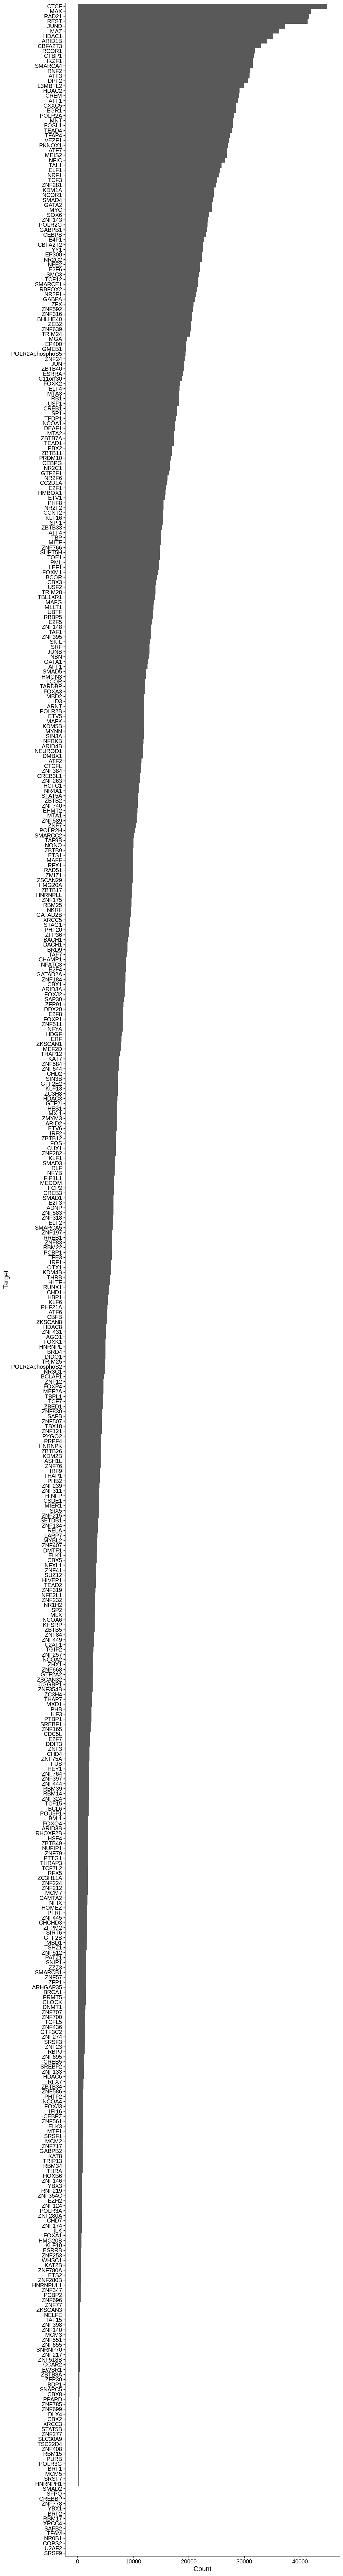

In [27]:
dat = dat_peak_annot_summary
dat = dat %>% dplyr::select(Peak, Note) %>% distinct()
res = table(dat$Note)

dat = data.frame(res)
colnames(dat) = c("Target", "Count")

dat = dat %>%
    dplyr::arrange(Count) %>%
    dplyr::mutate(Target = factor(Target, levels=Target))

gpt = ggplot(dat, aes(x=Target, y=Count)) + 
    geom_col(width=1) +
    theme_cowplot() +
    coord_flip()
    #theme(axis.text.x = element_text(angle=90, vjust=0.5, hjust=1))

options(repr.plot.height=75, repr.plot.width=10)
print(gpt)

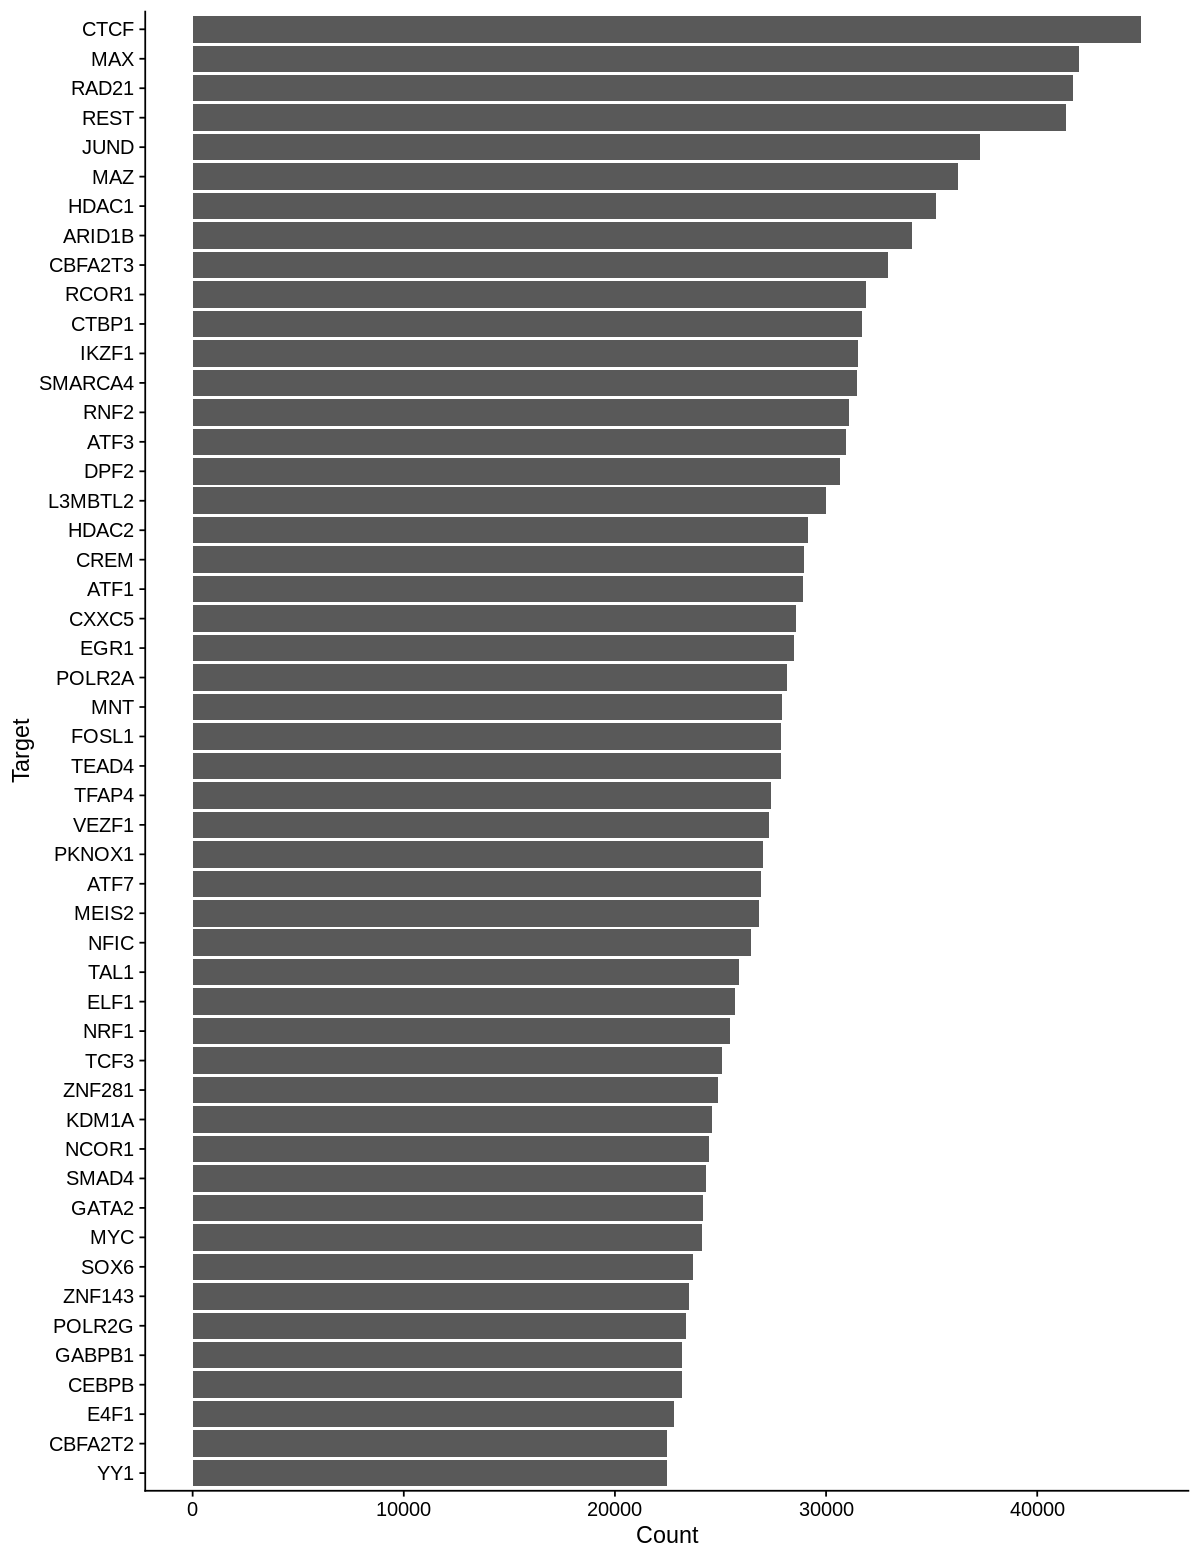

In [40]:
dat = dat_peak_annot_summary
dat = dat %>% dplyr::select(Peak, Note) %>% distinct()
res = table(dat$Note)

dat = data.frame(res)
colnames(dat) = c("Target", "Count")

dat = dat %>%
    dplyr::arrange(-Count) %>%
    dplyr::mutate(Target = factor(Target, levels=rev(Target)))
dat = head(dat, 50)

gpt = ggplot(dat, aes(x=Target, y=Count)) + 
    geom_col() +
    theme_cowplot() +
    coord_flip()
    #theme(axis.text.x = element_text(angle=90, vjust=0.5, hjust=1))

options(repr.plot.height=13, repr.plot.width=10)
print(gpt)

## Save results

In [41]:
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    "KS91_K562_ASTARRseq_peak_macs_input", 
    "summary")
fname = "peak.summary.chipseq_tf.tsv"
fpath = file.path(fdiry, fname)

dat = dat_peak_annot_summary
write_tsv(dat, fpath)